<center><h1>Analyse du Tri par tas</h1></center>

Dans ce document nous allons analyser les résultats de l'algorithme de tri par tas afin de déterminer les conditions dans lesquelles l'algorithme est le plus performant.

## Analyse théorique 

Avant d'analyser le résultat de nos expérimentations sur cet algorithme, nous allons étudier la complexité du Tri par tas.

Algorithme TriParTas :
    
    fonction tamiser(tableau T,entier noeud,entier N):
        entier k = noeud
        entier j = 2*k
        Tant que j <= N Faire
            Si j < N et T[j] < T[j+1] Alors
                j += 1
            Si T[k] < T[j] Alors
                echanger(T[k],T[j])
                k = j
                j = 2k
            Sinon
                j = n+1
    
    fonction triParTas(tableau T, taille N):
        Pour i allant de N//2 à 1
            tamiser(T,i,N)
        Pour i allant de N à 2
            echanger(T[i],T[1])
            tamiser(T,1,i-1)

Première étape - construction du tas initial :
La boucle "for" qui construit le tas initial itère sur la moitié du tableau, soit n/2 éléments. À chaque itération, la fonction tamiser est appelée, qui effectue l'opération d'entassement du tas. L'opération d'entassement a une complexité de O(log n) car elle parcourt l'arbre du tas en suivant un chemin descendant de longueur maximale log n. Ainsi, la complexité totale de la construction du tas initial est de O(n/2 * log n) = O(n log n).

Deuxième étape - opération de tri :
La boucle "for" qui effectue l'opération de tri dans la deuxième version itère sur les n éléments du tableau en ordre décroissant. À chaque itération, la fonction "tamiser" est appelée avec une taille de tas de i-1. La fonction "tamiser" a une complexité de O(log i) car elle parcourt l'arbre du tas en suivant un chemin descendant de longueur maximale log i. Ainsi, la complexité totale de l'opération de tri est de O(n * log n) car la somme des complexités des appels de "tamiser" pour chaque élément est :
log 1 + log 2 + log 3 + ... + log n
= log(n!) (parce que log(a) + log(b) = log(a * b) et log(a^b) = b * log(a))
= O(n log n) (parce que log(n!) = n * log n - n * log e + O(log n) selon la formule de Stirling)

Ainsi, la complexité totale de l'algorithme du tri par tas dans la deuxième version est de O(n log n) dans le pire des cas

## Analyse des résultats du Tri par tas

Dans cette partie nous allons analyser l'efficacité constatée de l'algorithme de tri par tas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy import odr
import time

### Tri de int

On importe dans la cellule suivante les données et on nomme les colonnes.

In [2]:
data = pd.read_csv('result_data/HeapSort.csv',sep=',')# On récupère les données correspondantes
print("Fichier lu")

data.columns = ["NumberElements","NombreEchangeRd",
                     "NombreComparaisonRd","TempsMSRd","NombreEchange1_2",
                     "NombreComparaison1_2","TempsMS1_2","NombreEchangeStart25",
                     "NombreComparaisonStart25","TempsMSStart25",
                     "NombreEchangeStart50","NombreComparaisonStart50",
                     "TempsMSStart50","NombreEchangeEnd25",
                     "NombreComparaisonEnd25","TempsMSEnd25",
                     "NombreEchangeEnd50","NombreComparaisonEnd50",
                     "TempsMSEnd50","NombreEchangeSorted",
                     "NombreComparaisonSorted","TempsMSSorted"]

Fichier lu


#### En particulier

On va comparer les temps d'exécution, le nombre de comparaisons, d'échanges, pour un grand nombre n afin de voir s'il y a un cas de désordre désavantageux.

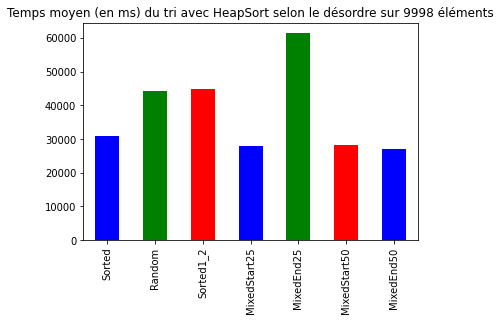

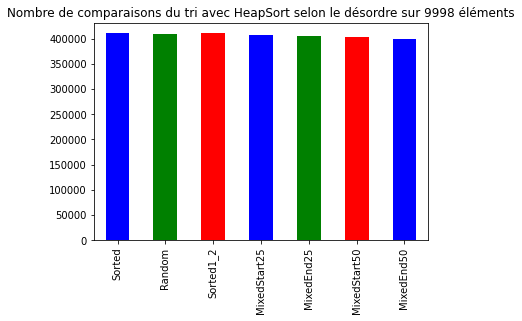

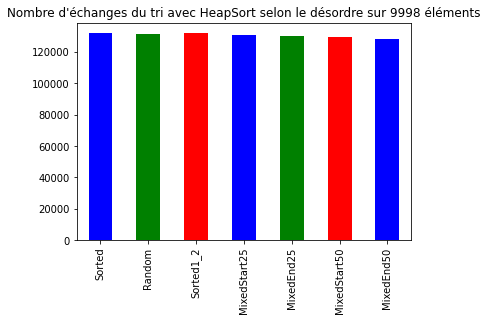

In [3]:
NomAlgorithme = "HeapSort"
n = 9998
vitesseDF = pd.DataFrame({
    'Elements':data.loc[:,'NumberElements'],
    'Sorted' : data.loc[:,'TempsMSSorted'],
    'Random' : data.loc[:,'TempsMSRd'],
    'Sorted1_2': data.loc[:,'TempsMS1_2'],
    'MixedStart25': data.loc[:,'TempsMSStart25'],
    'MixedEnd25': data.loc[:,'TempsMSEnd25'],
    'MixedStart50': data.loc[:,'TempsMSStart50'],
    'MixedEnd50': data.loc[:,'TempsMSEnd50']
})

echangesDF = pd.DataFrame({
    'Elements':data.loc[:,'NumberElements'],
    'Sorted' : data.loc[:,'NombreEchangeSorted'],
    'Random' : data.loc[:,'NombreEchangeRd'],
    'Sorted1_2': data.loc[:,'NombreEchange1_2'],
    'MixedStart25': data.loc[:,'NombreEchangeStart25'],
    'MixedEnd25': data.loc[:,'NombreEchangeEnd25'],
    'MixedStart50': data.loc[:,'NombreEchangeStart50'],
    'MixedEnd50': data.loc[:,'NombreEchangeEnd50']
})

comparaisonsDF = pd.DataFrame({
    'Elements':data.loc[:,'NumberElements'],
    'Sorted' : data.loc[:,'NombreComparaisonSorted'],
    'Random' : data.loc[:,'NombreComparaisonRd'],
    'Sorted1_2': data.loc[:,'NombreComparaison1_2'],
    'MixedStart25': data.loc[:,'NombreComparaisonStart25'],
    'MixedEnd25': data.loc[:,'NombreComparaisonEnd25'],
    'MixedStart50': data.loc[:,'NombreComparaisonStart50'],
    'MixedEnd50': data.loc[:,'NombreComparaisonEnd50']
})

finalCmpDF = pd.DataFrame({
    'Comparaisons': comparaisonsDF.loc[n,vitesseDF.columns != 'Elements']
})
finalTimeDF = pd.DataFrame({
    'Temps': vitesseDF.loc[n,vitesseDF.columns != 'Elements']
})
finalExDF = pd.DataFrame({
    'Echanges': echangesDF.loc[n,echangesDF.columns != 'Elements']
})

plt.figure()

finalTimeDF['Temps'].plot(kind = "bar", color = ['b','g','r'])
plt.title("Temps moyen (en ms) du tri avec " + NomAlgorithme + " selon le désordre sur " + str(n) + " éléments")
plt.show()

finalCmpDF['Comparaisons'].plot(kind = "bar", color = ['b','g','r'])
plt.title("Nombre de comparaisons du tri avec " + NomAlgorithme + " selon le désordre sur " + str(n) + " éléments")
plt.show()

finalExDF['Echanges'].plot(kind = "bar", color = ['b','g','r'])
plt.title("Nombre d'échanges du tri avec " + NomAlgorithme + " selon le désordre sur " + str(n) + " éléments")
plt.show()

Ici, on observe qu'en moyenne l'algorithme HeapSort n'a pas de cas où il est plus efficace dans la mesure où il réarrange les données à chaque lancement.
L'algorithme est à son maximum d'efficacité dans tous les cas car en effet il "mélange" le tableau au début.

#### Comportement par rapport aux quantités de données

Dans cette partie, nous allons observer comment le temps d'exécution évolue si l'on augmente la taille de l'échantillon à trier toujours selon le désordre.

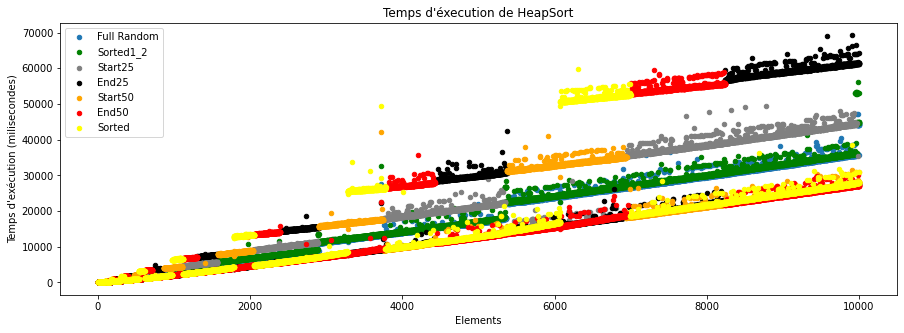

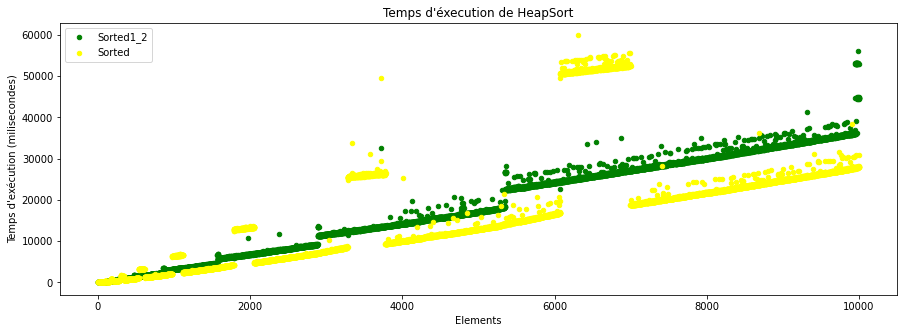

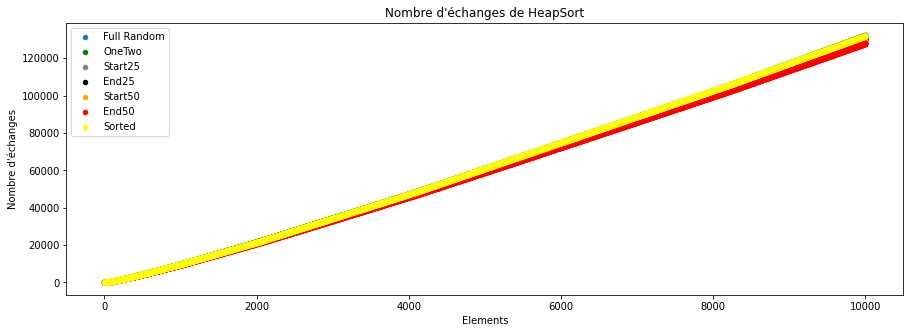

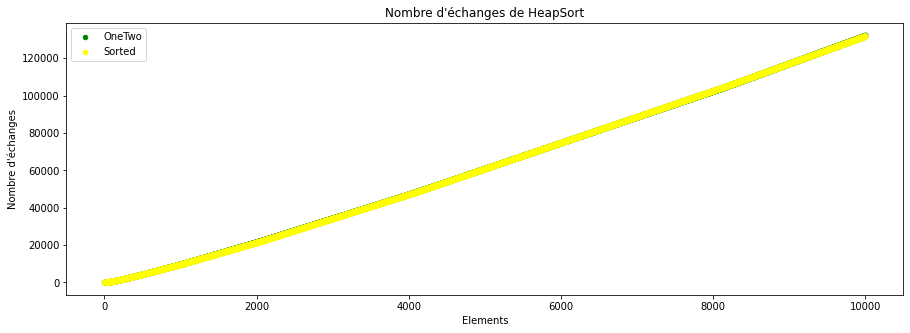

In [4]:
# solution trouvée sur https://stackoverflow.com/questions/13872533/how-to-plot-different-groups-of-data-from-a-dataframe-into-a-single-figure

fig = vitesseDF.plot.scatter(x = 'Elements', y = "Random",label = "Full Random",figsize=(15, 5)) # Permet de les mettre sur la même figure, à voir avec les vrais données si c'est lisible
vitesseDF.plot.scatter(x = "Elements", y = "Sorted1_2",c = 'g', label = "Sorted1_2", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = 'MixedStart25',c = 'grey',label = "Start25", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = 'MixedEnd25',c = 'black',label = "End25", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = 'MixedStart50',c = 'orange',label = "Start50", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = 'MixedEnd50',c = 'r',label = "End50", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = "Sorted",c = 'yellow', label = "Sorted", ax = fig)
plt.title("Temps d'éxecution de "+ NomAlgorithme)
fig.set_ylabel("Temps d'exécution (milisecondes)")
plt.legend(loc = 0)
plt.show()


fig = vitesseDF.plot.scatter(x = "Elements", y = "Sorted1_2",c = 'g', label = "Sorted1_2",figsize=(15, 5)) # Permet de les mettre sur la même figure, à voir avec les vrais données si c'est lisible
vitesseDF.plot.scatter(x = "Elements", y = "Sorted",c = 'yellow', label = "Sorted", ax = fig)
plt.title("Temps d'éxecution de "+ NomAlgorithme)
fig.set_ylabel("Temps d'exécution (milisecondes)")
plt.legend(loc = 0)
plt.show()

fig = echangesDF.plot.scatter(x = 'Elements', y = "Random",label = "Full Random",figsize=(15, 5)) # Permet de les mettre sur la même figure, à voir avec les vrais données si c'est lisible
echangesDF.plot.scatter(x = "Elements", y = "Sorted1_2",c = 'g', label = "OneTwo", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = 'MixedStart25',c = 'grey',label = "Start25", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = 'MixedEnd25',c = 'black',label = "End25", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = 'MixedStart50',c = 'orange',label = "Start50", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = 'MixedEnd50',c = 'r',label = "End50", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = "Sorted",c = 'yellow', label = "Sorted", ax = fig)
plt.title("Nombre d'échanges de "+ NomAlgorithme)
fig.set_ylabel("Nombre d'échanges")
plt.legend(loc = 0)
plt.show()

fig = echangesDF.plot.scatter(x = "Elements", y = "Sorted1_2",c = 'g', label = "OneTwo", figsize=(15, 5)) # Permet de les mettre sur la même figure, à voir avec les vrais données si c'est lisible
echangesDF.plot.scatter(x = "Elements", y = "Sorted",c = 'yellow', label = "Sorted", ax = fig)
plt.title("Nombre d'échanges de "+ NomAlgorithme)
fig.set_ylabel("Nombre d'échanges")
plt.legend(loc = 0)
plt.show()

On constate à l'aide de ce nuage de points que lorsque la quantité de données est très grande le HeapSort prend un temps $nlog(n)$ où n est la taille de l'échantillon (ici en rouge et orange pour la moitié du tableau désordonné).
On remarque d'ailleurs que le nombre d'échanges est identique quel que soit le type de mélange.

Si il y a des cassures au niveau de la courbe de temps c'est sûrement du à l'aléa des benchmarks.

In [5]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.odr.polynomial.html
# L'idée est ici de se représenter sous forme de fonction l'écart approximatif
# entre chacun de nos résultats pour une même taille de donnée

poly_model = odr.polynomial(2)

dataRandom = odr.Data(data.loc[:,'NumberElements'],data.loc[:,'TempsMSRd'])
odr_obj_rd = odr.ODR(dataRandom, poly_model)
output_rd = odr_obj_rd.run()

dataSorted= odr.Data(data.loc[:,'NumberElements'],data.loc[:,'TempsMSSorted'])
odr_obj_sorted = odr.ODR(dataSorted, poly_model)
output_sorted = odr_obj_sorted.run()

dataEnd50= odr.Data(data.loc[:,'NumberElements'],data.loc[:,'TempsMSEnd50'])
odr_obj_end50 = odr.ODR(dataEnd50, poly_model)
output_end50 = odr_obj_end50.run()

print(f"""Fonction d'approximation du temps d'exécution du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour un tableau déjà trié : \n""")
print("f(n) = n*",output_sorted.beta[1]," + n² *",output_sorted.beta[2])
print()

print(f"""Fonction d'approximation du temps d'exécution du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour un tableau mélangé aléatoirement: \n""")
print("f(n) = n*",output_rd.beta[1]," + n² *",output_rd.beta[2])
print()

print(f"""Fonction d'approximation du temps d'exécution du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour une moitié du tableau mélangé aléatoirement: \n""")
print("f(n) = n*",output_end50.beta[1]," + n² *",output_end50.beta[2])
print()


Fonction d'approximation du temps d'exécution du HeapSort
en ms en fonction de la taille de l'échantillon pour un tableau déjà trié : 

f(n) = n* -0.7160873214476607  + n² * 0.0006518903561727432

Fonction d'approximation du temps d'exécution du HeapSort
en ms en fonction de la taille de l'échantillon pour un tableau mélangé aléatoirement: 

f(n) = n* 4.007705805703247  + n² * -1.5006274626244991e-05

Fonction d'approximation du temps d'exécution du HeapSort
en ms en fonction de la taille de l'échantillon pour une moitié du tableau mélangé aléatoirement: 

f(n) = n* -0.8740892449491053  + n² * 0.0007056409065209184



On s'aperçoit ici que quelque soit le cas le HeapSort va réagir de la même façon, leur fonction d'approximation sont quasiment identiques.


In [6]:
dataRandom = odr.Data(data.loc[:,'NumberElements'],data.loc[:,'NombreEchangeRd'])
odr_obj_rd = odr.ODR(dataRandom, poly_model)
output_rd = odr_obj_rd.run()

dataSorted= odr.Data(data.loc[:,'NumberElements'],data.loc[:,'NombreEchangeSorted'])
odr_obj_sorted = odr.ODR(dataSorted, poly_model)
output_sorted = odr_obj_sorted.run()

dataEnd50= odr.Data(data.loc[:,'NumberElements'],data.loc[:,'NombreEchangeEnd50'])
odr_obj_end50 = odr.ODR(dataEnd50, poly_model)
output_end50 = odr_obj_end50.run()

print(f"""Fonction d'approximation du nombre d'échanges du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour un tableau déjà trié : \n""")
print("f(n) = n*",output_sorted.beta[1]," + n² *",output_sorted.beta[2])
print()

print(f"""Fonction d'approximation du nombre d'échanges du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour un tableau mélangé aléatoirement: \n""")
print("f(n) = n*",output_rd.beta[1]," + n² *",output_rd.beta[2])
print()

print(f"""Fonction d'approximation du nombre d'échanges du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour une moitié du tableau mélangé aléatoirement: \n""")
print("f(n) = n*",output_end50.beta[1]," + n² *",output_end50.beta[2])
print()


Fonction d'approximation du nombre d'échanges du HeapSort
en ms en fonction de la taille de l'échantillon pour un tableau déjà trié : 

f(n) = n* 11.583257662342781  + n² * 0.00018556136348122913

Fonction d'approximation du nombre d'échanges du HeapSort
en ms en fonction de la taille de l'échantillon pour un tableau mélangé aléatoirement: 

f(n) = n* 11.50693068131915  + n² * 0.00018546252727020225

Fonction d'approximation du nombre d'échanges du HeapSort
en ms en fonction de la taille de l'échantillon pour une moitié du tableau mélangé aléatoirement: 

f(n) = n* 11.17759281512955  + n² * 0.00018437616059371482



Dans ces approximations, on retrouve la similitude entre tous les cas.

## Bilan

Après avoir analysé l'algorithme HeapSort dans chacune des situations que nous avons expérimentées, nous proposons d'observer un diagramme en boîte nous permettant de déterminer quel est le pire cas d'utilisation et le meilleur cas d'utilisation de l'algorithme.

              Temps
Sorted        30960
Random        44283
Sorted1_2     44826
MixedStart25  27846
MixedEnd25    61453
MixedStart50  28128
MixedEnd50    27138


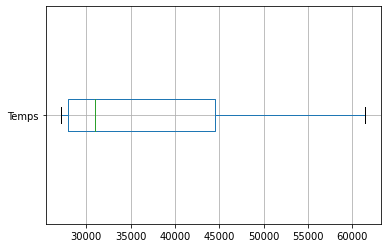

La meilleure des situations pour HeapSort est lorsqu'il tri un tableau mélangé avec l'algorithme MixedEnd50 de mélange.
La pire des situations pour HeapSort est lorsqu'il tri le tableau mélangé avec l'algorithme MixedEnd25 de mélange.
              Echanges
Sorted          131957
Random          131618
Sorted1_2       132005
MixedStart25    130617
MixedEnd25      129993
MixedStart50    129201
MixedEnd50      127989


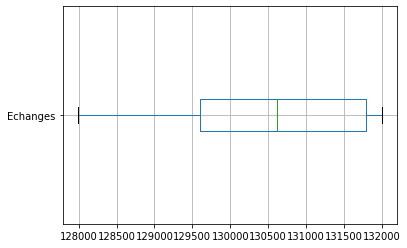

              Comparaisons
Sorted              410871
Random              409854
Sorted1_2           411015
MixedStart25        406851
MixedEnd25          404979
MixedStart50        402603
MixedEnd50          398967


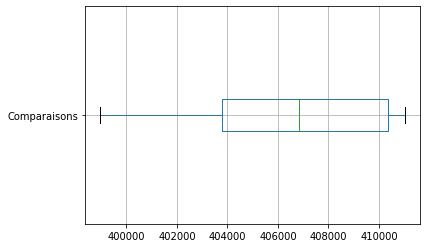

In [7]:
def findMaxRowColumnName(df):
    maximumRowsName = df.idxmax()
    return maximumRowsName

def findMinRowColumnName(df):
    minimumRowsName = df.idxmin()
    return minimumRowsName
minimum = findMinRowColumnName(finalTimeDF)
maximum = findMaxRowColumnName(finalTimeDF)

finalTimeDF.boxplot(vert = False)
print(finalTimeDF)
plt.show()

print("La meilleure des situations pour " + NomAlgorithme +
      " est lorsqu'il tri un tableau mélangé avec l'algorithme", minimum[0],"de mélange.")
print("La pire des situations pour " + NomAlgorithme + " est lorsqu'il tri le tableau mélangé avec l'algorithme", maximum[0],"de mélange.")

finalExDF.boxplot(vert = False)
print(finalExDF)
plt.show()
finalCmpDF.boxplot(vert = False)
print(finalCmpDF)

Pour conclure, nous pouvons dire que l'algorithme HeapSort est au maximum de son efficacité quelque soit le type de désordre.

Ainsi, l'algorithme prend un temps de l'ordre de $nlog(n)$ dans tous les cas.

La meilleure situation pour utiliser le HeapSort est lorsque l'échantillon de données n'est pas déjà trié, la pire des situations est lorsque le tableau est entièrement trié puisque nous le remélangeons. Il faut utiliser un autre algorithme si ce cas arrive plus souvent.